# Import Libraries for Visualizations

In [54]:
import numpy as np
import pandas as pd
import matplotlib.gridspec as gridspec
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import squarify
import matplotlib.cm as cm

---

# Import & Display Dataset  

In [25]:
#Untuk mengeload data set
df_ori=pd.read_csv('superstore_clean.csv')


#Membuat Duplicate df_ori
df=df_ori.copy()

#Tampilkan 5 data ter atas
df.head()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [26]:
# Display dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   row_id         9994 non-null   int64  
 1   order_id       9994 non-null   object 
 2   order_date     9994 non-null   object 
 3   ship_date      9994 non-null   object 
 4   ship_mode      9994 non-null   object 
 5   customer_id    9994 non-null   object 
 6   customer_name  9994 non-null   object 
 7   segment        9994 non-null   object 
 8   country        9994 non-null   object 
 9   city           9994 non-null   object 
 10  state          9994 non-null   object 
 11  postal_code    9994 non-null   int64  
 12  region         9994 non-null   object 
 13  product_id     9994 non-null   object 
 14  category       9994 non-null   object 
 15  sub_category   9994 non-null   object 
 16  product_name   9994 non-null   object 
 17  sales          9994 non-null   float64
 18  quantity

---

# Exploratory Data Analysis 

## Average Sales Across Different Regions

Now i want to create the average sales across different regions. so the bar chart is the best option to aggregate categorical coloumn like `region` and numerical column like `sales` to get the average sales across different regions. so this is our bar chart

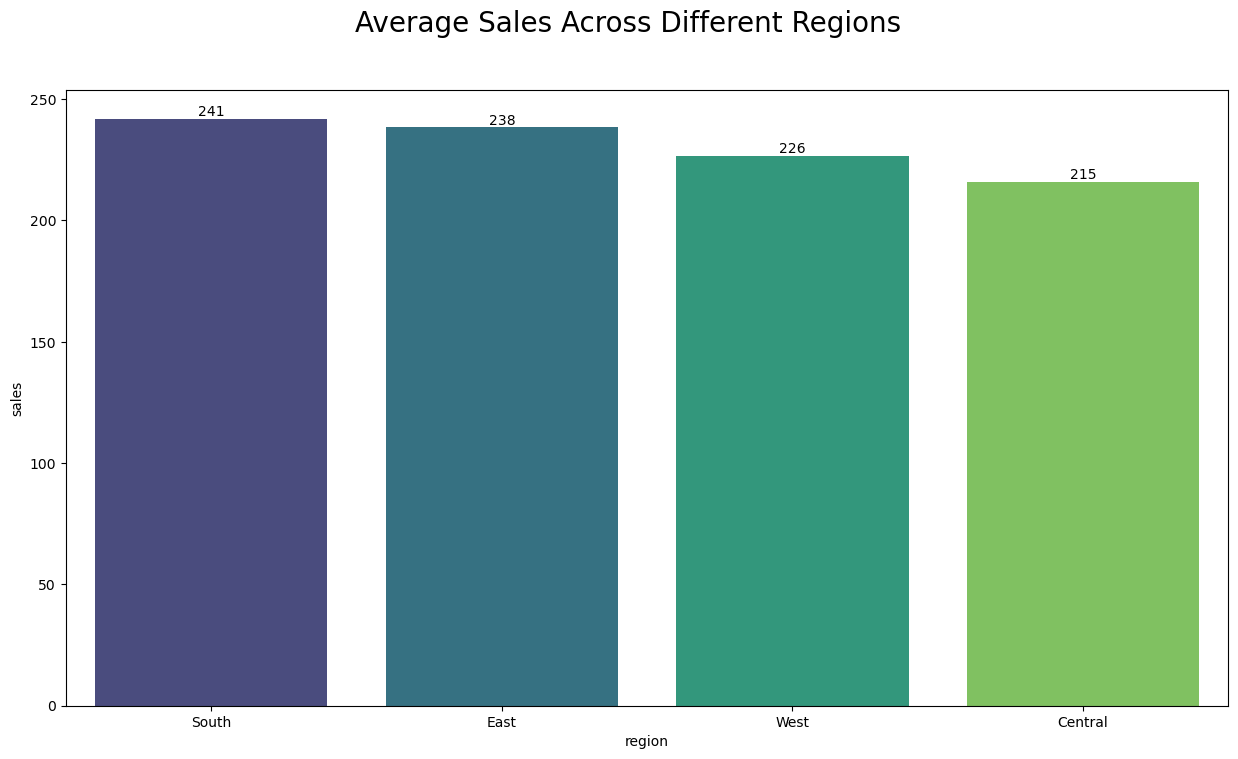

In [123]:
df_bar = df[['region','sales']]
df_bar = df_bar.groupby('region').mean().sort_values(by='sales', ascending=False)

plt.figure(figsize=[15,8]) # Setting the figure size

plt.suptitle("Average Sales Across Different Regions", size=20, ha='center')  # Title is centered


# Plotting the BarChart with Seaborn
plt.subplot()
sns.barplot(x=df_bar.index, y='sales', data=df_bar, palette='viridis')

# Menambahkan label count ke dalam plot
for index, value in enumerate(df_bar['sales']):
    plt.text(index, value, str(int(value)), ha='center', va='bottom')

plt.show()

from the bar chart above the region with the highest average sales is South Region with 241 values followed by East Region with 238 values then West Region with 226 values, and the lowest ones is Central Region with 215 values.

## Average Sales and Profit over Time Period(2014-2018)

Now we will create a chart about the average profit and sales trends over the years. The line chart is the best option to show the trend of both Sales and Profit over the Time Period. okay so this is our line chart related to the trend of both Sales and Profit over the Time Period

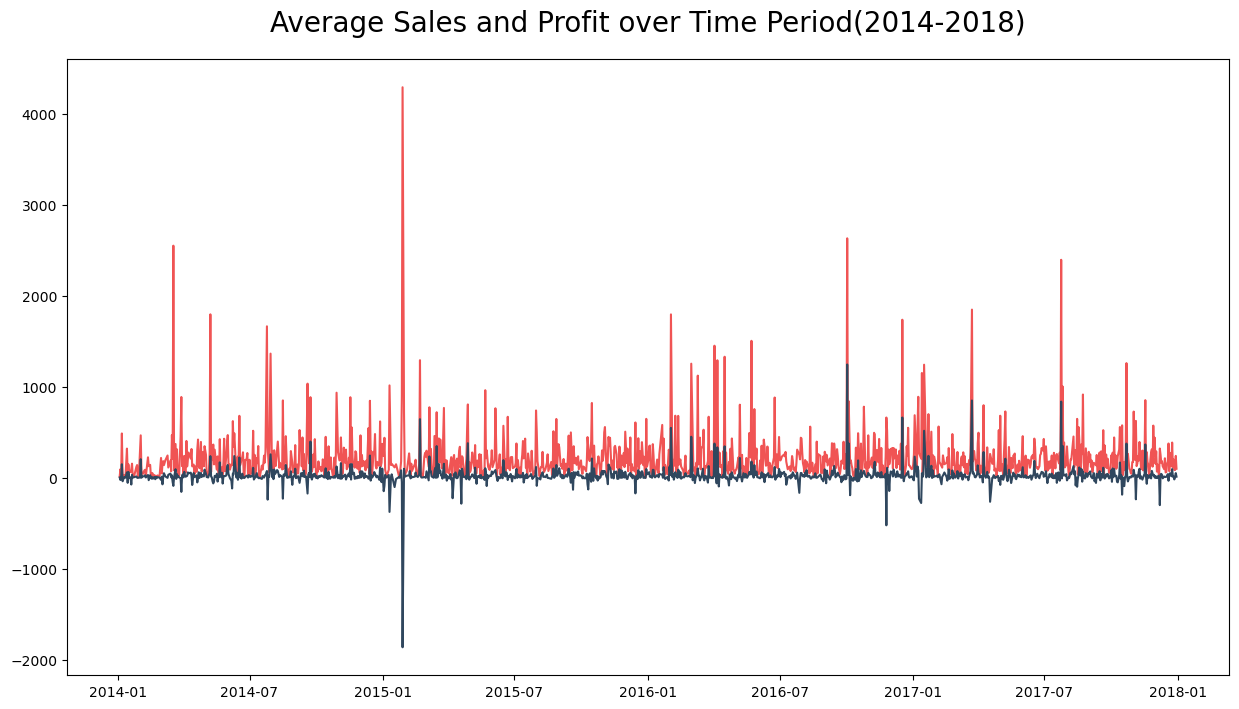

In [51]:
# First of all, we are going to take only the subset of data for our purpose. (To keep things simple)
df_line = df[['order_date','sales','profit']].sort_values('order_date') # Chronological Ordering
df_line['order_date'] = pd.to_datetime(df_line['order_date']) # Converting into DateTime
df_line = df_line.groupby('order_date').mean() # Groupby to get the average sales and profit on each day

# Visualizing the Line Chart
plt.figure(figsize=[15,8])
plt.plot(df_line.index, 'sales', data=df_line, color='#F05454') # Avg sales over Time
plt.plot(df_line.index, 'profit', data=df_line, color='#30475E') # Avg profit over Time
plt.title("Average Sales and Profit over Time Period(2014-2018)", size=20, pad=20)

plt.show()

From the line graph above we can see that the peak average profit in 2014-2015 reached around 2800 and the peak average loss was around 400. Then for 2015-2016 the peak average profit reached more than 4000 and in the same month the average loss peaked at 1800. The following year was 2016-2017 the average profit reaches 2600 but the average loss is not significant. In the last year, the average profit fluctuated from 2000-2500, then the average loss was only around 300. Overall, the average profit and loss reached its peak in 2015.

## Segment Vs Region Distribution

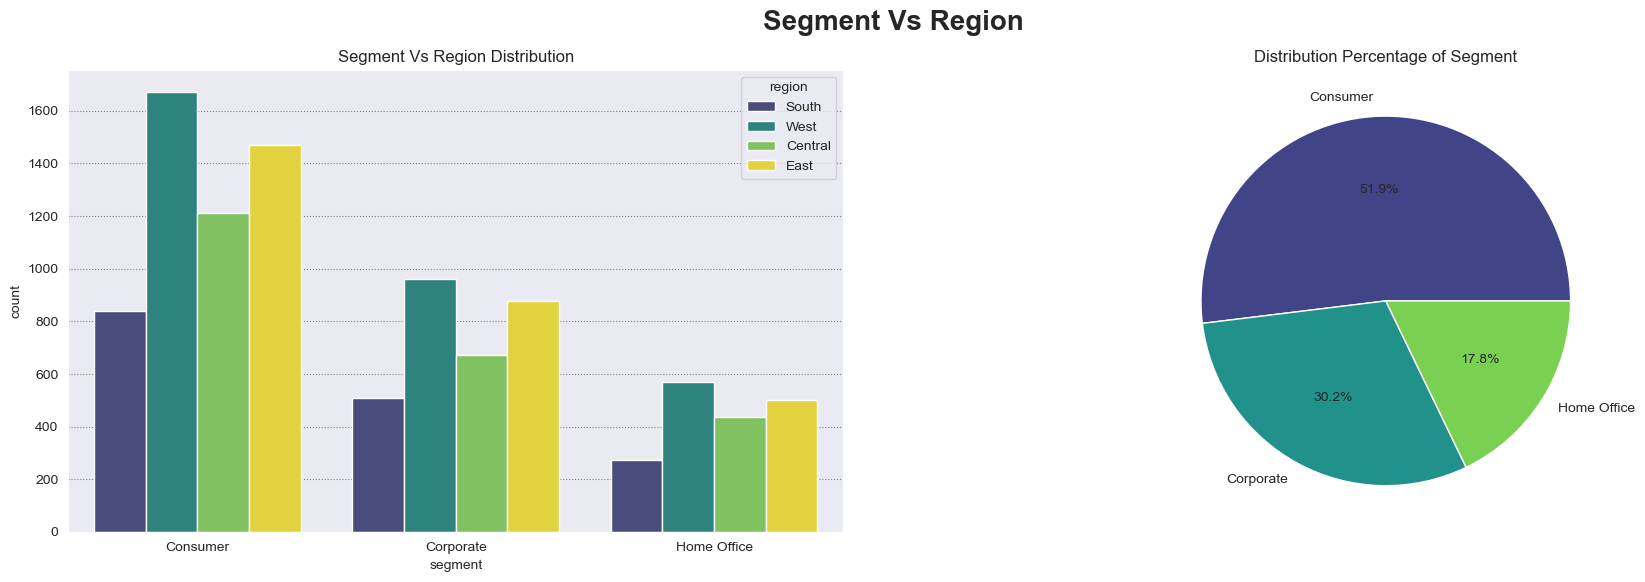

In [143]:
target_colors1 = plt.cm.viridis([0.2, 0.5, 0.8, 1.0])  # Membuat warna dari palet Viridis
# Membuat kotak dasar untuk chart
fig = plt.figure(figsize=(22,6))
plt.suptitle('Segment Vs Region',weight='bold',fontsize=20)
grid = gridspec.GridSpec(nrows=1, ncols=2, figure=fig)

# Membuat bar chart berisi count
ax1 = fig.add_subplot(grid[0,:1])
ax1.set_title('Segment Vs Region Distribution')
# Menggunakan seaborn untuk menggambar chart
sns.countplot(x='segment', data=df, ax=ax1, hue='region', palette=target_colors1)

# Mencoba membuat pie chart untuk melihat komposisi data cab_type
ax2 = fig.add_subplot(grid[0,1:])
ax2.set_title('Distribution Percentage of Segment')
# Memasukkan perhitungan values counts cab_type kedalam index
label = list(df['segment'].value_counts().index)
value = list(df['segment'].value_counts().values)

# Membuat pie chart
ax2.pie(value, labels=label, autopct='%1.1f%%', colors=target_colors1)
# Menunjukkan chart yang sudah dibuat
plt.show()

- From the bar chart that visualize segment against region, we can see that the highest segment is consumer, followed by corporate and home office. The region distributions against the three segments have almost the same pattern, West Region always occupied the highest records, the second place is East Region followed by Central Region and the lowest record is South Region.
- From the pie chart the biggest distribution of segment is consumer with `51.9% ` followed by corporate with `30.2% `and the least distribution of segment is home office with `17.8%`

## Category Composition of Sales & Profit

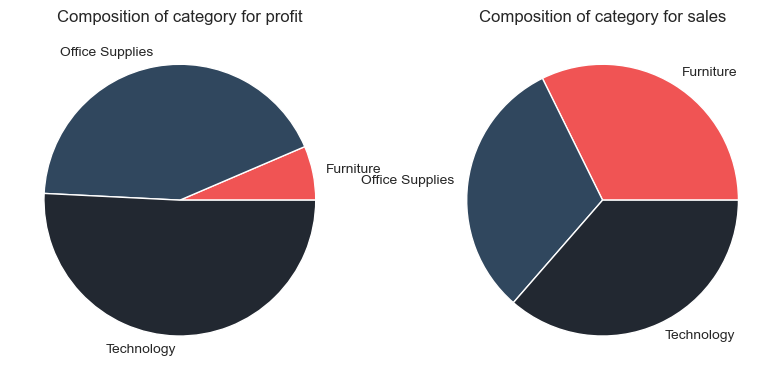

In [161]:
plt.figure(figsize=[10,15])
plt.subplot()

# Taking a subset of data (To keep things simple)
df_pie = df[['category','sales','profit']]
# taking a groupby on category and then ship_mode...
df_pie = df_pie.groupby(['category']).sum().reset_index()

# Visualizing the Pie Chart (profit)
plt.subplot(3,2,3)
plt.pie(df_pie['profit'], labels=df_pie['category'], colors=['#F05454','#30475E','#222831','#DDDDDD'])
plt.title("Composition of category for profit")

# Visualizing the Pie Chart (sales)
plt.subplot(3,2,4)
plt.pie(df_pie['sales'], labels=df_pie['category'], colors=['#F05454','#30475E','#222831','#DDDDDD'])
plt.title("Composition of category for sales")

plt.show()

From the first pie chart, we can see that the biggest profit composition is Technology, followed by Office Supplies and Furniture. Then for the second pie chart that shows composition of sales is almost balance between Technology, Furniture and Office Supplies.

## Distribution of Sales Across Ship Modes

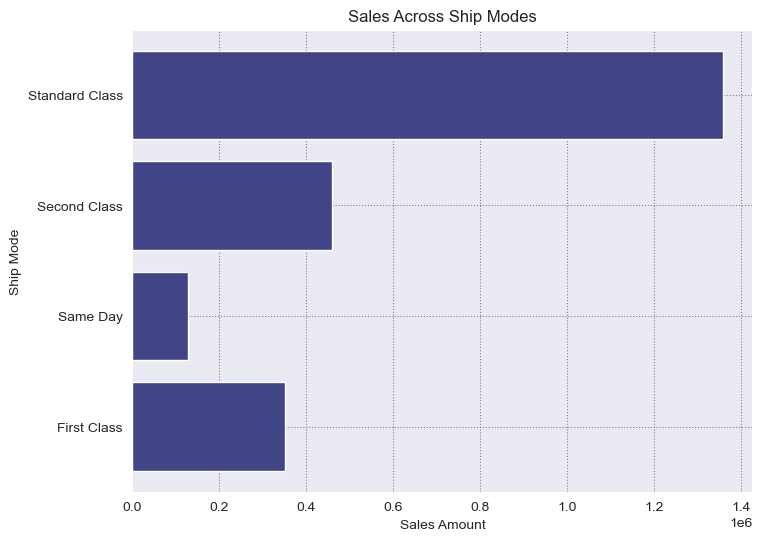

In [ ]:
# Taking a subset of data (To keep things simple)
df_stackb = df[['ship_mode','sales','profit']]
# taking a groupby on category and then ship_mode...
df_stackb = df_stackb.groupby(['ship_mode']).sum().reset_index()

# Visualizing the Stacked BarChart
fig, ax = plt.subplots(figsize=(8, 6))

# Creating horizontal bar chart for sales
ax.barh(y=df_stackb['ship_mode'], width=df_stackb['sales'], color=plt.cm.viridis(0.2))
ax.set_title('Sales Across Ship Modes')
ax.set_xlabel('Sales Amount')
ax.set_ylabel('Ship Mode')

plt.show()


From the chart above that visualize the type of ship mode that generates the most sales is Standard Class then followed by Second Class, after that First Class, and the ship mode that generates the least sales is Same Day. This is make sense because the Standard Class is definitely the cheapest shipping costs and the Same Day is the most expensive thats why the largest number of sales come from Standard Class since most customers chose the cheapest option.


## Sales vs Profit Across Different Customer Segments

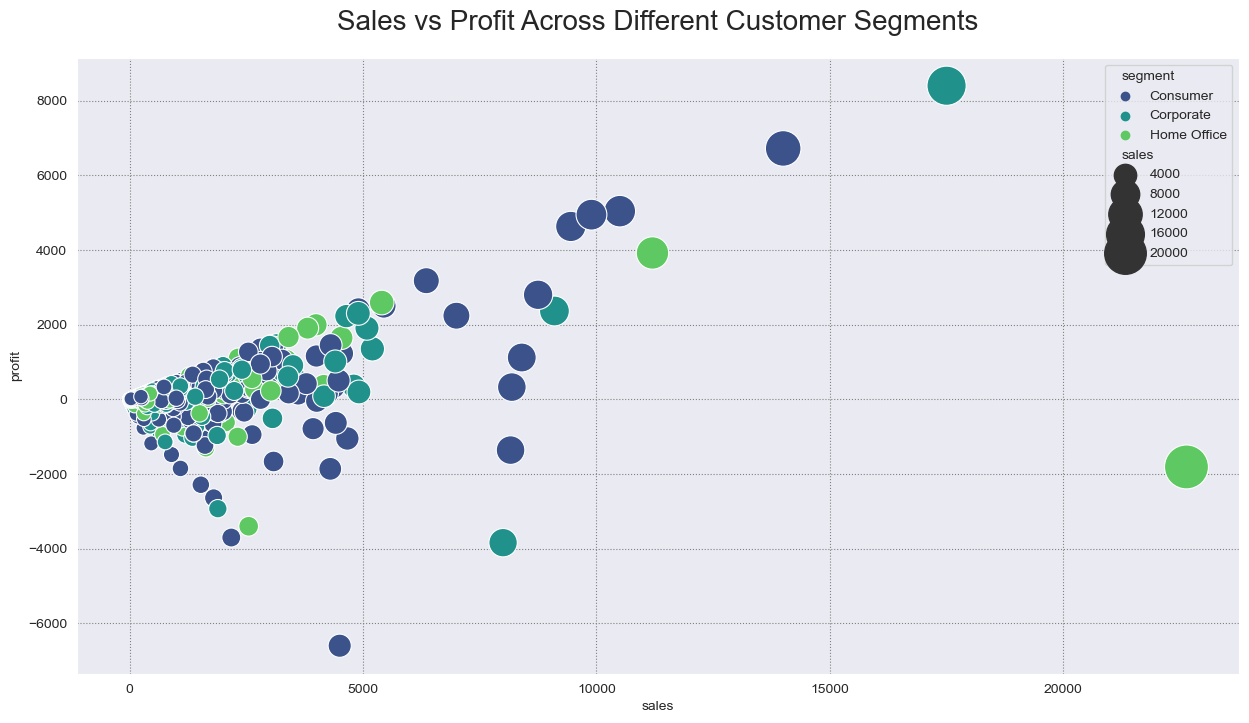

In [133]:
df_scatter = df[['sales','profit','segment']]

# Visualizing the ScatterPlot
plt.figure(figsize=[15,8])
# Profit in the Y axis, and Sales in the X. Hue will classify the dots according to Segment.
# The size of the dots are according to the volumen of "Sales".
sns.scatterplot(x=df_scatter['sales'], y=df_scatter['profit'], hue=df_scatter['segment'], palette='viridis', size=df_scatter["sales"], sizes=(100,1000), legend='auto') 
plt.title("Sales vs Profit Across Different Customer Segments", size=20, pad=20)
plt.show()

- From scatter plot above the bigger circle show the higher sales of Segment that distinct by the different color. The light green show home office segment, the dark green show the corporate segment, and the blue color show the consumer segment.
- The distribution of the segment commonly range around 0-5000 sales product and profited to 2000 while the loss reach around -4000.
- For sales in range 5000-15.000 dominated by the consumer segment where the profit bigger than the loss
- For sales in range 15.000-20.000 only generated by corporate segment, and also produced the highest profit of the sales exceeded 8000
- There are extreme case where values of sales exceeded 20.000 but ends up losing profit from home office segment

## Correlation Between Features

<Axes: >

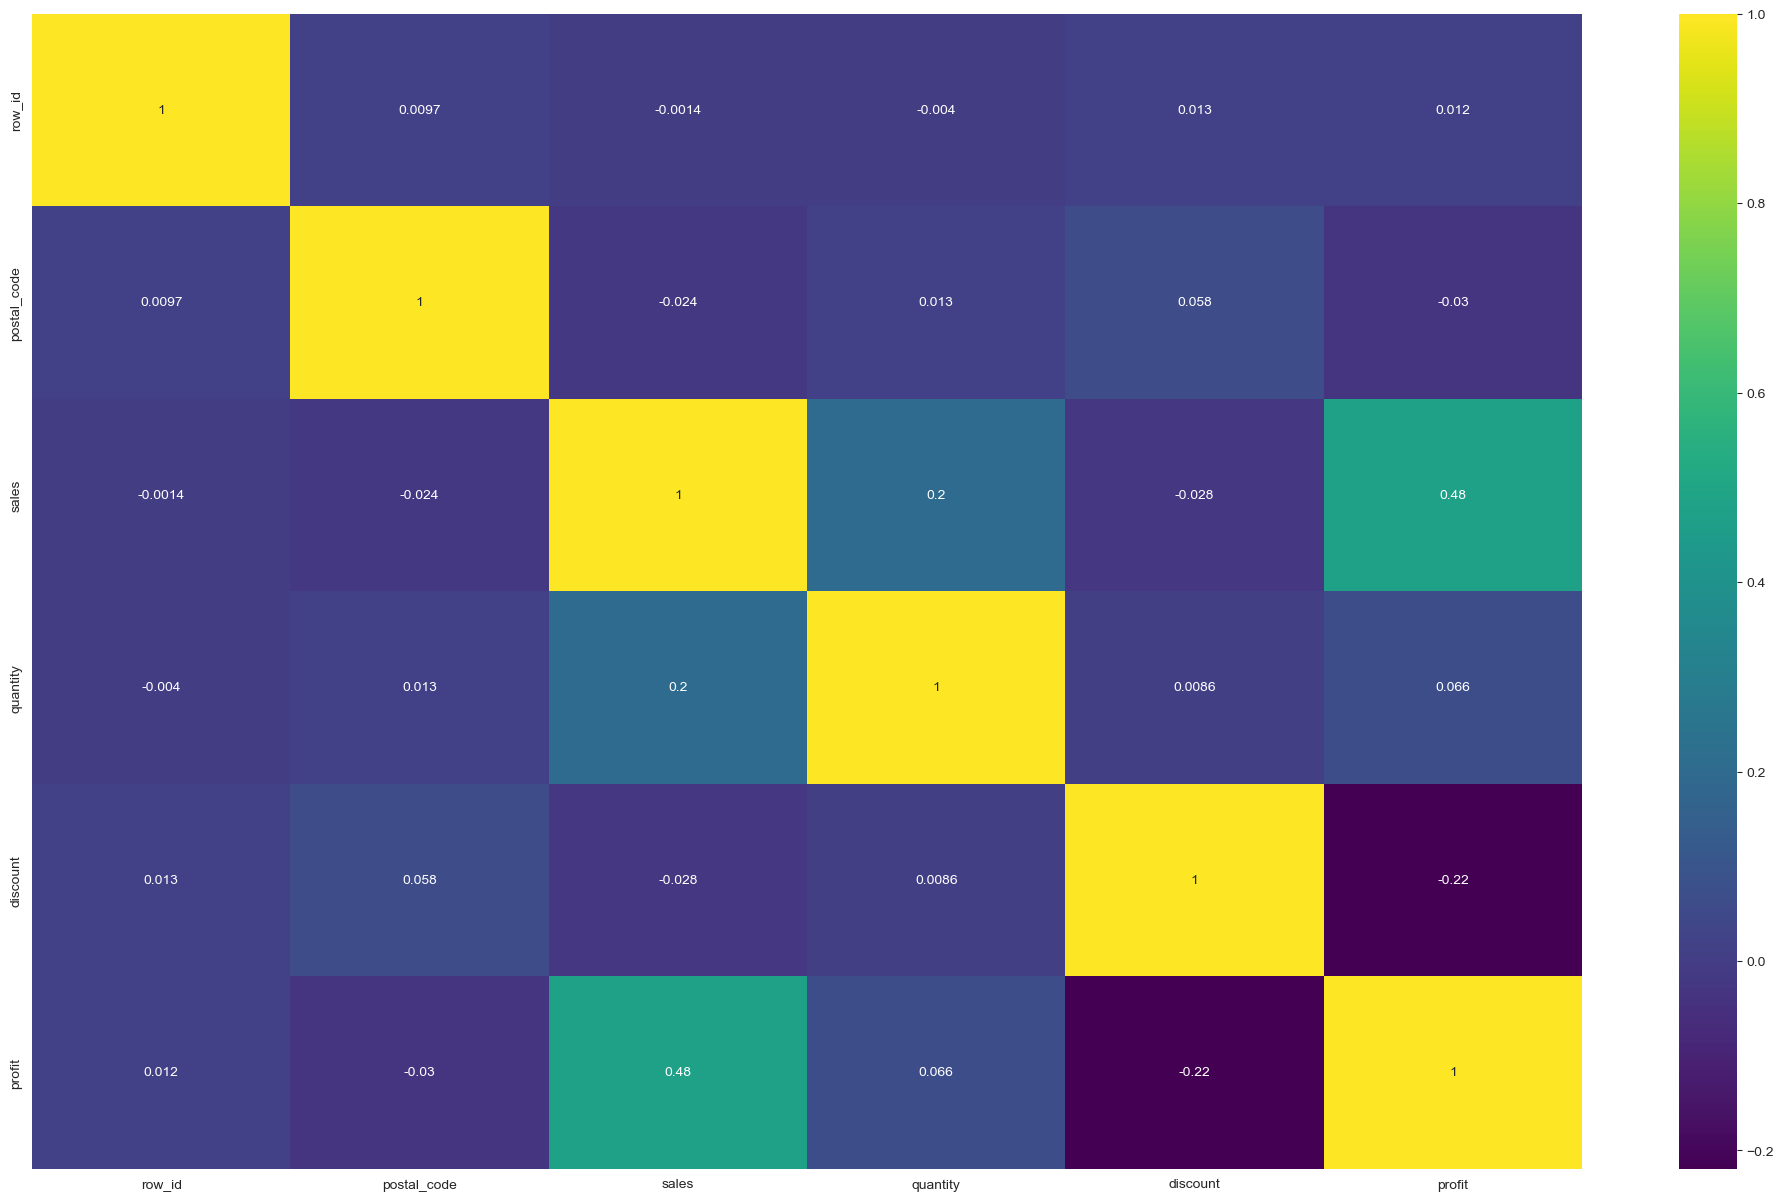

In [144]:
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(),annot=True,cmap='viridis')

From the heatmap, almost all the features have weak correlation with target except the sales that shows bigger correlation than other features with the target. 